In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Introduction tot data assimilation
## Practical session Day 2 : Tangent and adjoint models

### D2.2 Tangent model and parameter estimation (SIR epidemiologic model)

We consider the following ODE system (SIR model) that models the spread of an epidemics in a population:
\begin{array}{lr}
S'(t)=-\tau S(t)I(t),& \\
I'(t)=\tau S(t)I(t)-\nu I(t)&\\
R'(t)=\nu I(t),&t\in[0,T],\\
\end{array}

together with the initial condition: $S(t=0)=N-I0, I(t=0)=I_0, R(t=0)=0$.\\

In this exercise we  fix the time interval $[0,T] = [0,250]$, and the following values: $N=6e7, I_0=1$. The values of $y$ are computed on every integer point in this interval (observations available every day).


- Compute the derivatives wrt the parameters $\tau, \nu$. 
    - Implement a function Dy that takes as input $\tau, \nu$ and as output the Jacobian matrix of $y$ wrt these 2 parameters. Check the validity of this function using finite differences.
	
- Fix some values $\theta^*=(\tau^*, \nu^*)$ close to $(3.10^{-9}, 10^{-1})$ up to a factor of e.g. 10. Compute the solution $y(\theta^*)=(S,I,R)$ and add gaussian noise to $I$ to generate the observations. (Note: here the observation operator $L$ consists of measuring the quantity $I(t)$).
- Implement the Gauss-Newton algorithm to estimate the parameters with an initial guess that is not close from $\theta^*$.

In [7]:
parameters = {'tau':3e-9, 'nu':1e-2}
N0 = 6e7
I0 = 1

In [8]:
def SIR(t,y,tau,nu):
    s = y[0]
    i = y[1]
    r = y[2]
    yprime = [## -?- ##]
    return yprime

def SIRDSIR(t,Y,tau,nu):  
    # d1 : derivative wrt tau ; d2 : derivative wrt nu
    s = Y[0]
    i = Y[1]
    r = Y[2]
    d1s = Y[3]
    d1i = Y[4]
    d1r = Y[5]
    d2s = Y[6]
    d2i = Y[7]
    d2r = Y[8]
    dts = ## -?- ##
    dti = ## -?- ##
    dtr = ## -?- ##
    dtd1s = ## -?- ##
    dtd1i = ## -?- ##
    dtd1r = ## -?- ##
    dtd2s = ## -?- ##
    dtd2i = ## -?- ##
    dtd2r = ## -?- ##

    return np.array([dts,dti,dtr,dtd1s,dtd1i,dtd1r,dtd2s,dtd2i,dtd2r])


def yDy(tau,nu):
    # solve the ODE and the 3 tangent models
    sol = solve_ivp(SIRDSIR,[0,T],[N0-I0,I0,0,0,0,0,0,0,0],t_eval=timepoints,args=(tau,nu),rtol = 1e-6)
    return sol.y

In [9]:
T = 250
numpoints = 300
timepoints = np.linspace(0,T,numpoints)

tau0 = parameters['tau']
nu0 = parameters['nu']
Y = yDy(tau0, nu0)
Yr = np.reshape(Y[:3,:],3*numpoints)
Jacobian = np.zeros((3*numpoints,2))
Jacobian[:,0] = np.reshape(Y[3:6,:],3*numpoints)
Jacobian[:,1] = np.reshape(Y[6:9,:],3*numpoints)


#%%########## check for the derivatives
h = 1e-9*np.random.randn(2)
for epsilon in [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12]:    
    Yh = yDy(tau0+epsilon*h[0], nu0+epsilon*h[1])
    Yhr = np.reshape(Yh[:3,:],3*numpoints)
    difdiv = 1/epsilon * (Yhr-Yr)
    product_jac = np.dot(Jacobian,h)
    reldifference = np.linalg.norm(difdiv-product_jac)/np.linalg.norm(difdiv)
    print(epsilon,reldifference)

#%%############# parameters estimation
tautrue = parameters['tau']
nutrue = parameters['nu']


Ytrue = yDy(tautrue, nutrue)
noiselevel = 5e4
Iobs = Ytrue[1,:] + noiselevel*np.random.randn(numpoints)

0.01 0.002775644878972691
0.0001 2.822177755434447e-05
1e-06 4.781282131973087e-06
1e-08 3.8043970485328074e-05
1e-10 0.0015041757732504458
1e-12 0.0036970705788990717


0 [4.56236501e-09 1.46556668e-02]
1 [3.94340452e-09 8.66095415e-03]
2 [3.39617414e-09 9.28624445e-03]
3 [3.04259342e-09 9.88297526e-03]
4 [2.99948207e-09 1.00003346e-02]
5 [2.99980756e-09 9.99971790e-03]
6 [2.99980750e-09 9.99971816e-03]
7 [2.99980750e-09 9.99971816e-03]
8 [2.99980750e-09 9.99971816e-03]
9 [2.99980750e-09 9.99971816e-03]
10 [2.99980750e-09 9.99971816e-03]
11 [2.99980750e-09 9.99971816e-03]
12 [2.99980750e-09 9.99971816e-03]
13 [2.99980750e-09 9.99971816e-03]
14 [2.99980750e-09 9.99971816e-03]
15 [2.99980750e-09 9.99971816e-03]
16 [2.99980750e-09 9.99971816e-03]
17 [2.99980750e-09 9.99971816e-03]
18 [2.99980750e-09 9.99971816e-03]
19 [2.99980750e-09 9.99971816e-03]


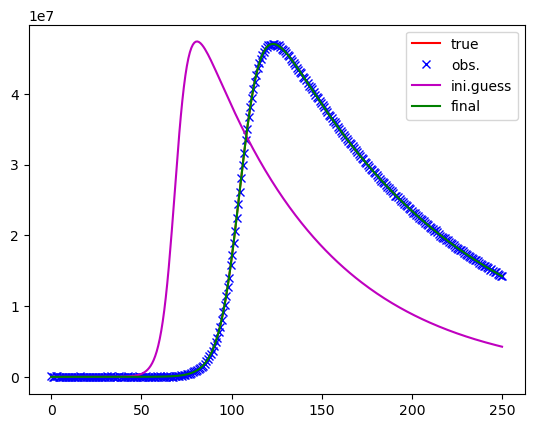

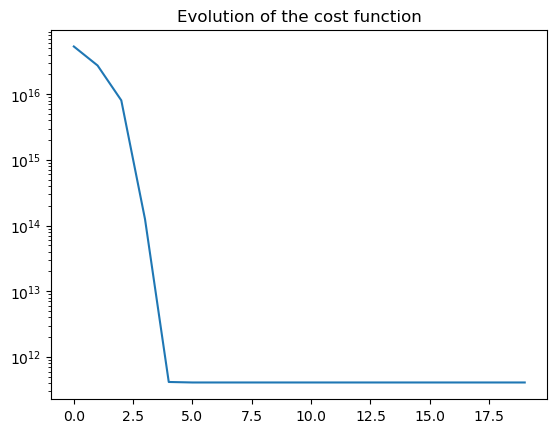

In [10]:
fig, ax = plt.subplots()
ax.plot(timepoints,Ytrue[1,:],'r',label='true')
ax.plot(timepoints,Iobs,'bx',label='obs.')

precision = 0.8

tauini = tautrue*(1-precision+2*precision*np.random.rand())
nuini = nutrue*(1-precision+2*precision*np.random.rand())

paramk = np.array([tauini, nuini])
nbit = 20
Jlist = []

for it in range(nbit):
    print(it, paramk)
    Y = yDy(paramk[0], paramk[1])
    Ik = Y[1,:]
    if it==0:
        ax.plot(timepoints,Ik,'m',label='ini.guess')
    F = Ik - Iobs
    Jlist.append(0.5*np.linalg.norm(Ik-Iobs)**2)
    DF = np.zeros((numpoints,2))
    DF[:,0] = np.reshape(Y[4,:],numpoints)
    DF[:,1] = np.reshape(Y[7,:],numpoints)

    DFTF = np.dot(DF.transpose(),F)
    DFTDF = np.dot(DF.transpose(),DF)
    dk = np.linalg.solve(DFTDF, -DFTF)
    paramk = paramk + 1*dk
    
ax.plot(timepoints,Ik,'g',label='final')
ax.legend()

fig, ax = plt.subplots()
ax.semilogy(Jlist)
ax.set_title('Evolution of the cost function');